# Assessment 4 MATH70094 Programming for Data Science Autumn 2025

# Kutadgu Gokalp Demirci - 06071571

# Question 2 (75 marks)

**The only non-base-Python packages you are allowed to load in this question are Pandas, Numpy, unittest.**

Your task is to build a Python package that samples from a target density using the Metropolis-Hastings algorithm.

# Background

The (random walk) Metropolis-Hastings algorithm is a method for generating samples from a probability distribution with pdf $\pi$ when we cannot sample from it directly, but we can evaluate $\pi$ (up to a constant). The algorithm constructs a Markov chain whose stationary distribution is the probability distribution we want to sample from. We consider only pdf's on $\mathbb{R}$. 

Given the current state $x\in\mathbb{R}$, the algorithm works as follows:

(1) Draw a candidate $y\in\mathbb{R}$ from the normal distribution $N(0,\sigma^2)$ for a given $\sigma^2>0$.

(2) Compute the acceptance probability $\alpha(x, y) = \min(1,\; \pi(y)/\pi(x))$.

(3) Draw a value $z$ from the uniform distribution on $[0,1]$. If $z<\alpha(x,y)$, then we accept the candidate $y$ and make it the current state. Otherwise, we reject $y$ and keep the current state $x$.

Repeating this process yields a Markov chain that eventually behaves like draws from the distribution with density $\pi$. We usually only keep samples after `burn_in` initial samples, so the chain has settled in a region where the target density has mass. We can use the samples to approximate e.g. expectations and histograms. An important performance metric is the `acceptance rate`, which is the number of accepted candidates divided by the number of total candidates. A reasonable acceptance rate in practice is typically between 0.3 and 0.5, as a smaller acceptance rate indicates that the chain moves only rarely (and is possibly stuck), while larger acceptance rates imply that the proposals are too close to the current state and the chain moves slowly. 

## Code clarity (5 marks)

There is a famous saying among software developers that code is read more often than it is written. Marks will be awarded (or not awarded) based on the clarity of the code and appropriate use of comments.

# Part A (18 marks)

Create a file `metropolisHastings.py` containing a Python class `MetropolisHastings` with at least the following fields and methods:

(1) fields:
* `log_target` - a function that returns the log of the (unnormalised) target density $\pi$
* `proposal_std` - the standard deviation $\sigma$ of the Gaussian proposal
* `current_state` - the current state of the sampler

(2) methods:
* `__init__` - takes as inputs the `log_target` function, the `proposal_std` deviation, the `initial_state` and the `seed` to initialise the random number generator for reproducibility
* `acceptance_rate` - returns the acceptance rate of the sampler so far
* `step` - performs a single step in the algorithm; updates the current state or keeps it unchanged
* `sample` - takes as inputs the number of wanted samples `n_samples` and the length of the `burn_in` period; runs the algorithm for `n_samples` + `burn_in` steps and returns `n_samples` samples after the `burn_in` phase

Create a second file `utils.py` that contains two methods:

* `plot_trace` - takes a list of samples and plots them (this is called a *trace* plot)
* `plot_histogram` - takes a list of samples and plots their normalised histogram

**Observe the following:**

* Include appropriate (but brief) documentation for all methods. 
* Use defensive programming techniques to check for incorrect input. 
* Fields and methods may be public or private or protected. 
* You may add additional fields and methods if you think this is helpful.
* Part B gives marks for appropriate unit tests. Try to follow a test based development approach when implementing the class and methods.

# Part B (10 marks)

Create a file `test_metropolisHastings.py` with appropriate unit tests for the class and methods from part A except for the `plot_trace` and `plot_histogram` methods. Write at least one test per method and one test for the class itself.

# Part C (12 marks)

Create a folder `metropolisHastingsPackage` that follows the standard Python package structure. Add the Python source files from parts A and B in the appropriate places. Take care of the following points:

* Make sure that all unit tests pass. 
* Make appropriate modifications of the `pyproject.toml` and the `README.md` files. Keep the descriptions brief.

Create a Python package called `MCMCSampling`. The result should be the file `mcmcsampling-0.0.1.tar.gz` if you have chosen version number 0.0.1. 

# Part D (15 marks)

Using the package `MCMCSampling`, use the code blocks below to answer the following questions.

# Part D(i) (8 marks)

(1) Install and load the package you have created in part C. Using your `MCMCSampling` package, generate 5000 samples of the standard normal distribution with a proposal standard deviation of 2, initial state 10.0, seed 42, and burn in phase of 1000. (6 marks)

In [26]:
# add your code here

from mcmcsampling import MetropolisHastings
import numpy as np

def log_standard_normal(x):
    return -0.5 * x**2

sampler = MetropolisHastings(log_target=log_standard_normal,
                             proposal_std=0.2,
                             initial_state=10,
                             seed=42)

samples = sampler.sample(n_samples=5000,
                         burn_in=1000)

print(f"Generated {len(samples)} samples")
print(f"Acceptance rate: {sampler.acceptance_rate():.4f}")
print(f"Mean of samples: {np.mean(samples):.4f}")
print(f"Standard deviation of samples: {np.std(samples):.4f}")

Generated 5000 samples
Acceptance rate: 0.9332
Mean of samples: 0.0904
Standard deviation of samples: 0.9045


(2) Print the acceptance rate, plot the trace plot and plot the histogram of the samples. (1 mark) 

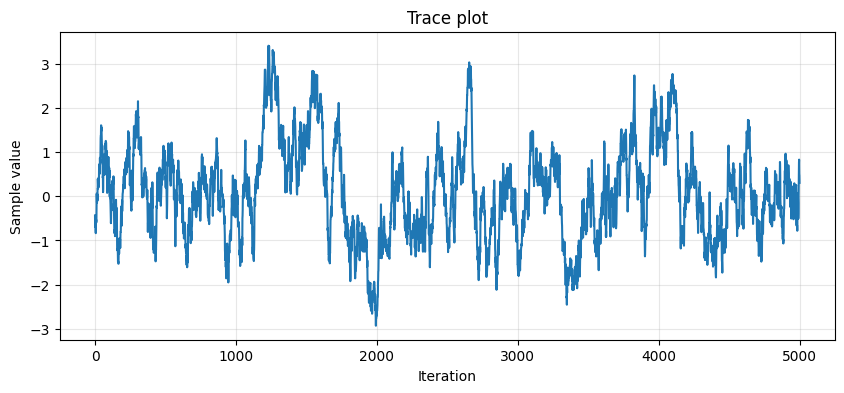

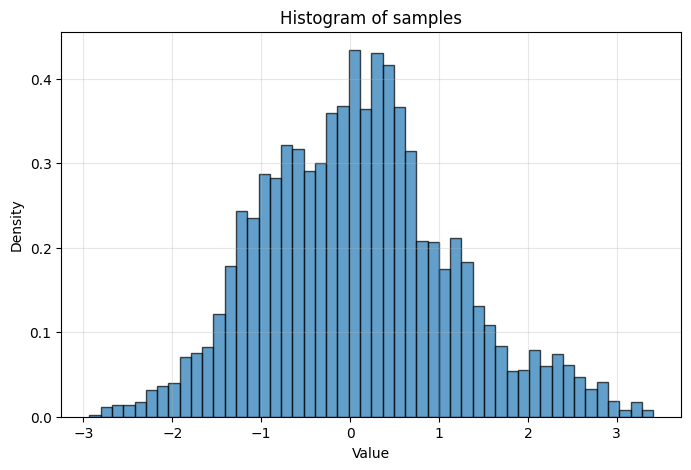

In [24]:
# add your code here
from mcmcsampling.utils import plot_trace, plot_histogram

plot_trace(samples)

plot_histogram(samples)


(3) Compute the mean and the standard deviation of the samples (they should be compared to the target distribution mean and standard deviation). (1 mark)

In [25]:
#add your code here
print(f"The mean and standard deviation of the samples are: {samples.mean():.4f}, {samples.std():.4f}")

# the mean and standard deviation are close to the "true" values 0 and 1 respectively

The mean and standard deviation of the samples are: 0.0847, 1.0709


## Part D(ii) (7 marks)

Let $f(x;\mu,\sigma)$ be the density of a Gaussian distribution with mean $\mu\in\mathbb{R}$ and standard deviation $\sigma>0$. A *Gaussian mixture* has density $\pi(x) = w_1 * f(x;\mu_1,\sigma_1) + w_2 * f(x;\mu_2,\sigma_2)$ for weights $w_1,w_2\geq 0$ such that $w_1+w_2=1$ and $\mu_1,\mu_2\in\mathbb{R}$, $\sigma_1,\sigma_2>0$. 

For the mixture components given in the code cell below, we want to generate 100000 samples from the corresponding Gaussian mixture distribution with a burn in period of 1000, with initial state 0.0 and seed 42. Find a proposal standard deviation such that the acceptance rate of the Metropolis Hastings algorithm is close to 0.5.

In [23]:
# mixture components
w1, mu1, sigma1 = 0.3, -3.0, 1.0
w2, mu2, sigma2 = 0.7,  2.0, 0.5


# add your code here
import numpy as np
from mcmcsampling import MetropolisHastings

def log_gaussian_mixture(x):
    # Compute log of each component
    log_f1 = -0.5 * ((x - mu1) / sigma1) ** 2 - np.log(sigma1)
    log_f2 = -0.5 * ((x - mu2) / sigma2) ** 2 - np.log(sigma2)
    
    # Combine with weights using log-sum-exp
    log_w1_f1 = np.log(w1) + log_f1
    log_w2_f2 = np.log(w2) + log_f2
    max_log = max(log_w1_f1, log_w2_f2)
    
    return max_log + np.log(np.exp(log_w1_f1 - max_log) + np.exp(log_w2_f2 - max_log))

proposal_standard = 1.26

sampler_part_d = MetropolisHastings(log_target=log_gaussian_mixture,
                                    proposal_std=proposal_standard,
                                    initial_state=0,
                                    seed=42)

samples_part_d = sampler_part_d.sample(n_samples=100000, burn_in=1000)

print(f"For the proposal standard deviation of {proposal_standard}, the acceptence rate is {sampler_part_d.acceptance_rate():4f} in {len(samples_part_d)} samples.")

For the proposal standard deviation of 1.26, the acceptence rate is 0.502030 in 100000 samples.


# Part E (15 marks)

Considering all the topics we have covered in the module, give an
example of something that, as a language, Python does better than R. It
could also be a feature which Python has, but R does not. There is more
than one correct answer, but you may *only provide one answer*.
You may *not* use examples which refer to topics in future
modules such as "R is better at regression" or "Python is better at
deep learning". Try to refer to topics or features you have covered in
this module, but please do not refer to statistical or machine learning
procedures covered in future modules.

Besides describing the example, you also need to provide
accompanying scripts in both Python and R that demonstrates the
advantage described by your example.

Note that a significant proportion of the marks are allocated to the
provision of the example scripts and screenshots that will support your
answer.

For your solution, create a subfolder `Q2E` containing the
following:

* A text file `q2e.txt.` where you describe your answer.
* Example scripts `q2e.R` and `q2e.py` in R and Python, and any data files, to support your answer.
* (optional) Screenshots in `.png`, `.jpg` or `.pdf` format if appropriate to your answer.

